In [76]:
# conda install tensorflow-gpu  # BUNU YÜKLE

import pandas as pd
import datetime as dt

# Visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Transformer model
from transformers import pipeline

# Import Reddit data
The data contains the top posts from 3 subreddits: Datascience, MachineLearning and artificial. Data is obtained with Python Reddit API Wrapper library.

In [44]:
# Load data
posts_df = pd.read_csv('CLIMATE_posts.csv')


In [45]:
comments_df = pd.read_csv('CLIMATE_comments.csv')

In [46]:
# Number of observations - for metric cells
number_of_posts = posts_df.shape[0]
number_of_comments = comments_df.shape[0]
count_subreddits = posts_df['subreddit'].nunique()

In [47]:
# Convert created date to normal datetime
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,iroh4c,ClimateCrisis,1.599958e+09,NaN,https://grist.org/climate/oregons-air-quality-...,Oregon’s air quality is so far beyond ‘hazardo...,NaN,15,2,1.00,2020-09-13 03:44:04,2020
1,g2zapw,ClimateCrisis,1.587119e+09,NaN,https://www.bbc.com/news/world-latin-america-5...,Brazil: Amazon land defender Zezico Guajajara ...,NaN,17,2,1.00,2020-04-17 13:17:36,2020
2,hqzo7h,ClimateCrisis,1.594726e+09,NaN,https://i.redd.it/rgvgen324ta51.jpg,Fi(ni)shed,NaN,14,1,1.00,2020-07-14 14:20:07,2020
3,f5e1o5,ClimateCrisis,1.581968e+09,NaN,https://www.theguardian.com/environment/2020/f...,‘The only uncertainty is how long we’ll last’:...,NaN,13,0,0.93,2020-02-17 22:25:45,2020
4,ezy7wf,ClimateCrisis,1.581020e+09,NaN,https://dailyhive.com/vancouver/greta-thunberg...,Looks like Greta Thunberg isn't buying Justin ...,NaN,14,1,1.00,2020-02-06 23:12:57,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
295,x36qdq,ClimateCrisis,1.662036e+09,NaN,https://apnews.com/article/floods-indonesia-ja...,Pictures From Indonesia: 10 Photos Of People W...,NaN,3,1,1.00,2022-09-01 15:44:21,2022
296,wrik9q,ClimateCrisis,1.660826e+09,NaN,https://apnews.com/article/floods-bangladesh-d...,Pictures From Bangladesh: Climate Migration: 1...,NaN,3,0,1.00,2022-08-18 15:40:42,2022
297,wr7g1b,ClimateCrisis,1.660790e+09,NaN,https://apnews.com/article/science-middle-east...,Global Warming: Scientists Warn Of Dire Effect...,NaN,3,0,1.00,2022-08-18 05:27:03,2022
298,wm9xk8,ClimateCrisis,1.660273e+09,NaN,https://apnews.com/article/world-news-hungary-...,Pictures From Hungary: 10 Photos Of People Str...,NaN,3,0,0.80,2022-08-12 05:49:41,2022


In [48]:
# Merge posts with their comments
comments_posts_df = posts_df.merge(comments_df, on='post_id', how='left')

# Remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

# EDA

In [49]:
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,iroh4c,ClimateCrisis,1.599958e+09,NaN,https://grist.org/climate/oregons-air-quality-...,Oregon’s air quality is so far beyond ‘hazardo...,NaN,15,2,1.00,2020-09-13 03:44:04,2020
1,g2zapw,ClimateCrisis,1.587119e+09,NaN,https://www.bbc.com/news/world-latin-america-5...,Brazil: Amazon land defender Zezico Guajajara ...,NaN,17,2,1.00,2020-04-17 13:17:36,2020
2,hqzo7h,ClimateCrisis,1.594726e+09,NaN,https://i.redd.it/rgvgen324ta51.jpg,Fi(ni)shed,NaN,14,1,1.00,2020-07-14 14:20:07,2020
3,f5e1o5,ClimateCrisis,1.581968e+09,NaN,https://www.theguardian.com/environment/2020/f...,‘The only uncertainty is how long we’ll last’:...,NaN,13,0,0.93,2020-02-17 22:25:45,2020
4,ezy7wf,ClimateCrisis,1.581020e+09,NaN,https://dailyhive.com/vancouver/greta-thunberg...,Looks like Greta Thunberg isn't buying Justin ...,NaN,14,1,1.00,2020-02-06 23:12:57,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
295,x36qdq,ClimateCrisis,1.662036e+09,NaN,https://apnews.com/article/floods-indonesia-ja...,Pictures From Indonesia: 10 Photos Of People W...,NaN,3,1,1.00,2022-09-01 15:44:21,2022
296,wrik9q,ClimateCrisis,1.660826e+09,NaN,https://apnews.com/article/floods-bangladesh-d...,Pictures From Bangladesh: Climate Migration: 1...,NaN,3,0,1.00,2022-08-18 15:40:42,2022
297,wr7g1b,ClimateCrisis,1.660790e+09,NaN,https://apnews.com/article/science-middle-east...,Global Warming: Scientists Warn Of Dire Effect...,NaN,3,0,1.00,2022-08-18 05:27:03,2022
298,wm9xk8,ClimateCrisis,1.660273e+09,NaN,https://apnews.com/article/world-news-hungary-...,Pictures From Hungary: 10 Photos Of People Str...,NaN,3,0,0.80,2022-08-12 05:49:41,2022


In [50]:
from lets_plot import *
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="subreddit", fill="subreddit"), data=posts_df, sampling="none" if posts_df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Number of posts by year")

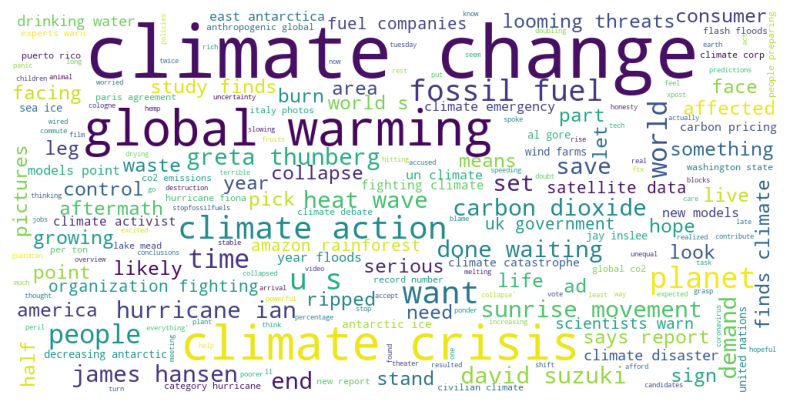

In [51]:
post_title_text = ' '.join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500, # collocation kısmı iki kelime halinde gösteriyor
                        background_color = 'white'
                       ).generate(post_title_text)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Wordcloud post titles by year

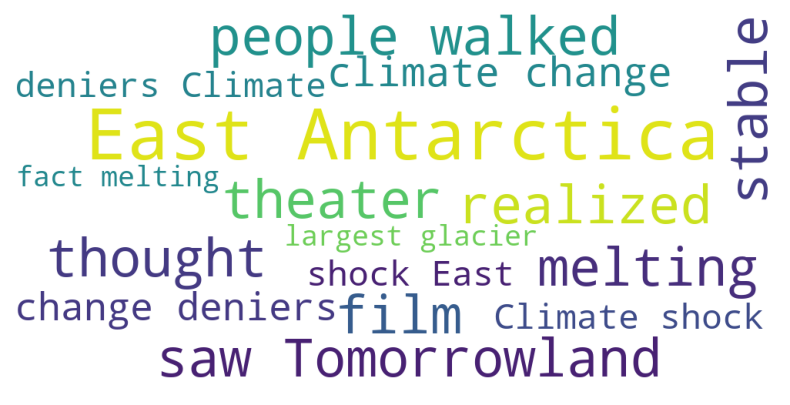

In [52]:
selected_year = 2015
posts_in_year = posts_df[posts_df['created_year'] == selected_year]
post_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white',
                    ).generate(post_title_text_year)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Sentiment analysis

In [77]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [56]:
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:
        sentiment = 'Not classified'

    return sentiment

In [58]:
word_input = "crisis"

In [59]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains(word_input)]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
26,csjw83,ClimateCrisis,1.566234e+09,NaN,https://www.cnn.com/videos/health/2019/06/14/c...,Why can't we seem to care about the climate cr...,NaN,9,1,0.92,2019-08-19 20:00:06,2019,A lot of people are caring about it though.\n\...
49,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I’ve started collecting climate change visuals...
50,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I think we could use a new sub dedicated to cl...
51,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,That’s not a bad idea! Visuals are really powe...
52,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,"Keep me in mind if you start the sub, and I'll..."
53,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I may take you up on that! I’ve never made a s...
129,dvbuvr,ClimateCrisis,1.573574e+09,If the US military is facing up to the climate...,https://www.reddit.com/r/ClimateCrisis/comment...,If the US military is facing up to the climate...,NaN,5,1,0.86,2019-11-12 18:56:07,2019,US Miltary declared climate change a national ...
255,h9e3fg,ClimateCrisis,1.592219e+09,NaN,https://www.salon.com/2020/06/15/europes-big-c...,Europe's big climate comeback: Facing the COVI...,NaN,5,1,1.00,2020-06-15 14:00:55,2020,It is good to see that at least some world lea...


In [60]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

/var/folders/9b/cmfkpvr91jx0c0jkcnfjh9nr0000gn/T/ipykernel_7804/3295694029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
26,csjw83,ClimateCrisis,1.566234e+09,NaN,https://www.cnn.com/videos/health/2019/06/14/c...,Why can't we seem to care about the climate cr...,NaN,9,1,0.92,2019-08-19 20:00:06,2019,A lot of people are caring about it though.\n\...,Not classified
49,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I’ve started collecting climate change visuals...,Not classified
50,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I think we could use a new sub dedicated to cl...,Not classified
51,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,That’s not a bad idea! Visuals are really powe...,Not classified
52,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,"Keep me in mind if you start the sub, and I'll...",Not classified
53,on9f8v,ClimateCrisis,1.626681e+09,NaN,https://www.theguardian.com/world/gallery/2021...,Climate crisis: 50 photos of extreme weather a...,NaN,8,5,0.85,2021-07-19 10:48:34,2021,I may take you up on that! I’ve never made a s...,Not classified
129,dvbuvr,ClimateCrisis,1.573574e+09,If the US military is facing up to the climate...,https://www.reddit.com/r/ClimateCrisis/comment...,If the US military is facing up to the climate...,NaN,5,1,0.86,2019-11-12 18:56:07,2019,US Miltary declared climate change a national ...,Not classified
255,h9e3fg,ClimateCrisis,1.592219e+09,NaN,https://www.salon.com/2020/06/15/europes-big-c...,Europe's big climate comeback: Facing the COVI...,NaN,5,1,1.00,2020-06-15 14:00:55,2020,It is good to see that at least some world lea...,Not classified


In [69]:
# Lets-plot library https://lets-plot.org/index.html
from lets_plot import *
from lets_plot.mapping import *

ggplot(comments_posts_df_sub) + geom_pie(aes(fill=as_discrete('sentiment', order_by='..count..')),
                                            size=30, hole=0.2, stroke=1.0,
                                            labels=layer_labels()
                                                    .line('@sentiment')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(),
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Sentiment of around the topic')

In [80]:
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [78]:
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key=lambda x: x['score'])['label']

    return emotion

In [79]:
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x))
comments_posts_df_sub

NameError: name 'emotion_classifier' is not defined

# Ask-Me-Climate Crisis chatbot (ChatGPT API + Reddit data)

In [87]:
# Import modules from llama_index and langchain
from llama_index import SimpleDirectoryReader, GPTSimpleVectorIndex, LLMPredictor, PromptHelper
from langchain import OpenAI
import os
from IPython.display import Markdown, display

ModuleNotFoundError: No module named 'llama_index'

In [88]:
# Combine all posts and comments and save to a text file
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext','comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()
agg_comments

,post_title,selftext,comment
0,"""Fire suppression has left forests dense, dry ...",nan,I fixed the headline.
1,'Climategate' review clears scientists of dish...,nan,"A storm in a tea cup, that never was!\r\n\r\nO..."
2,A 1973 MIT Supercomputer Predicted the End of ...,nan,"!RemindMe 2040. It’s okay, by then OpenAI will..."
3,A Real-World Example of Carbon Pricing Benefit...,nan,And further reading\n\nCarbon Tax Center : [My...
4,A War Reporter Covers “The End of Ice” — and I...,nan,“A willingness to live without hope allows me ...
...,...,...,...
73,"We’re Done Waiting, an organization fighting f...","Done Waiting is a progressive, grassroots orga...",Donated. Keep up the good work!. Thank you so ...
74,When will we start protesting in the U.S.?,nan,“The People's Climate March was a protest whic...
75,Why can't we seem to care about the climate cr...,nan,A lot of people are caring about it though.\n\...
76,Why can’t we get movement about stopping clima...,nan,"Well, let's start one.. There are lots of move..."


In [85]:
# (ONLY NEED TO RUN AND SAVE ONCE)
# agg_comments['combined_text'] = agg_comments.astype(str).agg('. '.join, axis=1)
# all_text = ' '.join(agg_comments['combined_text'])

# Save text to txt file
# f = open("textdata/all_text_reddit.txt", "w")
# f.write(all_text)
# f.close()

In [89]:
# Adapted based on LlamaIndex documentation https://gpt-index.readthedocs.io/en/latest/index.html
# and Dan Shipper's work https://www.lennysnewsletter.com/p/i-built-a-lenny-chatbot-using-gpt

def construct_index(directory_path):
    # set maximum input size
    max_input_size = 4096
    # set number of output tokens
    num_outputs = 256
    # set maximum chunk overlap
    max_chunk_overlap = 20
    # set chunk size limit
    chunk_size_limit = 600

    # define LLM (ChatGPT gpt-3.5-turbo)
    llm_predictor = LLMPredictor(llm=OpenAI(temperature=0, model_name="gpt-3.5-turbo", max_tokens=num_outputs))
    prompt_helper = PromptHelper(max_input_size, num_outputs, max_chunk_overlap, chunk_size_limit=chunk_size_limit)

    documents = SimpleDirectoryReader(directory_path).load_data()

    index = GPTSimpleVectorIndex(
        documents, llm_predictor=llm_predictor, prompt_helper=prompt_helper
    )

    index.save_to_disk('index.json')

    return index


def ask_me_anything(question):

    index = GPTSimpleVectorIndex.load_from_disk('index.json')
    response = index.query(question, response_mode="compact")

    display(Markdown(f"You asked: <b>{question}</b>"))
    display(Markdown(f"Bot says: <b>{response.response}</b>"))

In [91]:
# Set OpenAI key
os.environ["OPENAI_API_KEY"] = openai_key # write your own chatgpt API KEY

NameError: name 'openai_key' is not defined

In [92]:
# Run Reddit chatbot
ask_me_anything(question)

NameError: name 'question' is not defined

# REFERENCE
# https://www.youtube.com/watch?v=EE1Y2enHrcU